### SIR problem

For this problem you are going to work with the non-dimensionalized SIR problem. I'm not going to write the equations here. Recall that this model (once non-dimensionalized) has a single parameter, R0 which tells us something about the rate of spread of this disease.

1) Write a function that computes the right hand side of this differential equation. This needs to be in a form that DifferentialEquations.jl will take. I talked about this in class.

2) Simulate this problem for R0=1.5 and plot the simulation results for S, I, and R on a single plot. You should use DifferentialEquations.jl for this and follow the appraoch I showed in class. For your initial condition, begin with 100_000 susceptible people and 1 infected person as your initial condition (no recovered to start). Remember, you have to normalize this initial condition since in the non-dimensional case S(0)+I(0)+R(0) = 1.

3) Here you will look at the effect of R0 on the total disease burden. Choice 100 R0 values between 0.1 and 10. For each, simulate the system of equations for a sufficient amount of time that it reaches an equilibrium. At the final simulation time, extract the number of recovered individuals (R[end]). For each of your 100 R0 values you now have the total number of prople infected during the course of the epidemic. Plot this to see the effect of R0 on disease progression. 

In [4]:
using Pkg
Pkg.status()
Pkg.add("DifferentialEquations")
Pkg.add("Plots")

using LinearAlgebra, Plots, BenchmarkTools
using DifferentialEquations

Status `~/.julia/environments/v1.10/Project.toml` (empty project)


    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...


   Installed Calculus ───────────────────────── v0.5.1


   Installed OffsetArrays ───────────────────── v1.14.0


   Installed StatsFuns ──────────────────────── v1.3.1


   Installed HypergeometricFunctions ────────── v0.3.23
   Installed Accessors ──────────────────────── v0.1.36


   Installed PDMats ─────────────────────────── v0.11.31
   Installed DifferentialEquations ──────────── v7.13.0
   Installed Preferences ────────────────────── v1.4.3
   Installed TimerOutputs ───────────────────── v0.5.23
   Installed NonlinearSolve ─────────────────── v3.10.0


   Installed MaybeInplace ───────────────────── v0.1.2
   Installed Polyester ──────────────────────── v0.7.13
   Installed StaticArrays ───────────────────── v1.9.3
   Installed Sundials_jll ───────────────────── v5.2.2+0


   Installed EnumX ──────────────────────────── v1.0.4
   Installed CEnum ──────────────────────────── v0.5.0
   Installed RecursiveArrayTools ────────────── v3.13.0
   Installed FunctionWrappers ───────────────── v1.1.3


   Installed TriangularSolve ────────────────── v0.2.0
   Installed IntelOpenMP_jll ────────────────── v2024.1.0+0


   Installed SLEEFPirates ───────────────────── v0.6.42


   Installed BoundaryValueDiffEq ────────────── v5.7.1
   Installed Static ─────────────────────────── v0.8.10
   Installed RandomNumbers ──────────────────── v1.5.3
   Installed Missings ───────────────────────── v1.2.0


   Installed Distances ──────────────────────── v0.10.11


   Installed FiniteDiff ─────────────────────── v2.23.1


   Installed SteadyStateDiffEq ──────────────── v2.1.0
   Installed Tricks ─────────────────────────── v0.1.8
   Installed IrrationalConstants ────────────── v0.2.2
   Installed Functors ───────────────────────── v0.4.10
   Installed SIMDTypes ──────────────────────── v0.1.0
   Installed MuladdMacro ────────────────────── v0.2.4


   Installed ArnoldiMethod ──────────────────── v0.4.0


   Installed CpuId ──────────────────────────── v0.3.1
   Installed DiffEqBase ─────────────────────── v6.149.1


   Installed SimpleUnPack ───────────────────── v1.1.0
   Installed SciMLBase ──────────────────────── v2.35.0
   Installed NLsolve ────────────────────────── v4.5.1


   Installed BandedMatrices ─────────────────── v1.6.1


   Installed LinearSolve ────────────────────── v2.29.0
   Installed OrdinaryDiffEq ─────────────────── v6.74.1


   Installed ADTypes ────────────────────────── v0.2.7


   Installed SimpleNonlinearSolve ───────────── v1.7.0
   Installed StaticArraysCore ───────────────── v1.4.2


   Installed SpecialFunctions ───────────────── v2.3.1
   Installed NaNMath ────────────────────────── v1.0.2


   Installed IfElse ─────────────────────────── v0.1.1
   Installed DiffEqNoiseProcess ─────────────── v5.21.0


   Installed ThreadingUtilities ─────────────── v0.5.2


   Installed ManualMemory ───────────────────── v0.1.8
   Installed Rmath_jll ──────────────────────── v0.4.0+0
   Installed NLSolversBase ──────────────────── v7.8.3


   Installed LevyArea ───────────────────────── v1.0.0
   Installed JumpProcesses ──────────────────── v9.11.1
   Installed Random123 ──────────────────────── v1.7.0
   Installed LazyArrays ─────────────────────── v1.10.0
   Installed Graphs ─────────────────────────── v1.10.0


   Installed CommonSubexpressions ───────────── v0.3.0
   Installed ExprTools ──────────────────────── v0.1.10


   Installed DataStructures ─────────────────── v0.18.20


   Installed StatsBase ──────────────────────── v0.34.3
   Installed StatsAPI ───────────────────────── v1.7.0
   Installed Compat ─────────────────────────── v4.14.0


   Installed FastAlmostBandedMatrices ───────── v0.1.1
   Installed StaticArrayInterface ───────────── v1.5.0


   Installed ArrayLayouts ───────────────────── v1.9.2
   Installed MatrixFactorizations ───────────── v2.2.0
   Installed BitTwiddlingConvenienceFunctions ─ v0.1.5
   Installed SciMLStructures ────────────────── v1.1.0
   Installed DiffRules ──────────────────────── v1.15.1


   Installed FunctionWrappersWrappers ───────── v0.1.3


   Installed LayoutPointers ─────────────────── v0.1.15


   Installed TableTraits ────────────────────── v1.0.1
   Installed DiffResults ────────────────────── v1.1.0
   Installed GenericSchur ───────────────────── v0.5.4
   Installed oneTBB_jll ─────────────────────── v2021.12.0+0
   Installed Sundials ───────────────────────── v4.24.0
   Installed StochasticDiffEq ───────────────── v6.65.1
   Installed Inflate ────────────────────────── v0.1.4


   Installed PositiveFactorizations ─────────── v0.2.4


   Installed SciMLOperators ─────────────────── v0.3.8
   Installed DiffEqCallbacks ────────────────── v3.6.1
   Installed MKL_jll ────────────────────────── v2024.1.0+0


   Installed LoopVectorization ──────────────── v0.12.169
   Installed JLLWrappers ────────────────────── v1.5.0
   Installed Setfield ───────────────────────── v1.1.1


   Installed DelayDiffEq ────────────────────── v5.47.2
   Installed EnzymeCore ─────────────────────── v0.6.6
   Installed ConstructionBase ───────────────── v1.5.5
   Installed DataValueInterfaces ────────────── v1.0.0


   Installed FastClosures ───────────────────── v0.3.2
   Installed OrderedCollections ─────────────── v1.6.3


   Installed ChainRulesCore ─────────────────── v1.23.0
   Installed PolyesterWeave ─────────────────── v0.2.1


   Installed ArrayInterface ─────────────────── v7.10.0
   Installed Reexport ───────────────────────── v1.2.2
   Installed FastLapackInterface ────────────── v2.0.2
   Installed LineSearches ───────────────────── v7.2.0


   Installed KLU ────────────────────────────── v0.6.0
   Installed LogExpFunctions ────────────────── v0.3.27
   Installed PreallocationTools ─────────────── v0.4.21
   Installed AliasTables ────────────────────── v1.0.0
   Installed CloseOpenIntervals ─────────────── v0.1.12
   Installed Krylov ─────────────────────────── v0.9.5
   Installed PackageExtensionCompat ─────────── v1.0.2
   Installed MacroTools ─────────────────────── v0.5.13


   Installed OpenSpecFun_jll ────────────────── v0.5.5+0


   Installed CompositionsBase ───────────────── v0.1.2
   Installed SimpleTraits ───────────────────── v0.9.4


   Installed CommonSolve ────────────────────── v0.2.4


   Installed UnPack ─────────────────────────── v1.0.2
   Installed DocStringExtensions ────────────── v0.9.3
   Installed InverseFunctions ───────────────── v0.1.13
   Installed ExponentialUtilities ───────────── v1.26.1


   Installed GPUArraysCore ──────────────────── v0.1.6


   Installed Adapt ──────────────────────────── v4.0.4


   Installed StrideArraysCore ───────────────── v0.5.6
   Installed DualNumbers ────────────────────── v0.6.8
   Installed Rmath ──────────────────────────── v0.7.1


   Installed CPUSummary ─────────────────────── v0.2.4
   Installed VectorizationBase ──────────────── v0.21.66
   Installed RuntimeGeneratedFunctions ──────── v0.5.13


   Installed VertexSafeGraphs ───────────────── v0.2.0
   Installed Tables ─────────────────────────── v1.11.1
   Installed DataAPI ────────────────────────── v1.16.0
   Installed RecipesBase ────────────────────── v1.3.4
   Installed TruncatedStacktraces ───────────── v1.4.0
   Installed IteratorInterfaceExtensions ────── v1.0.0
   Installed ConcreteStructs ────────────────── v0.2.3


   Installed Optim ──────────────────────────── v1.9.4


   Installed HostCPUFeatures ────────────────── v0.1.16
   Installed FillArrays ─────────────────────── v1.10.1
   Installed QuadGK ─────────────────────────── v2.9.4
   Installed PrecompileTools ────────────────── v1.2.1
   Installed ForwardDiff ────────────────────── v0.10.36


   Installed PoissonRandom ──────────────────── v0.4.4


   Installed ResettableStacks ───────────────── v1.1.1


   Installed SymbolicIndexingInterface ──────── v0.3.16


   Installed FastBroadcast ──────────────────── v0.2.8
   Installed Requires ───────────────────────── v1.3.0
   Installed RecursiveFactorization ─────────── v0.2.23


   Installed Parameters ─────────────────────── v0.12.3
   Installed SortingAlgorithms ──────────────── v1.2.1
   Installed Distributions ──────────────────── v0.25.108


   Installed SparseDiffTools ────────────────── v2.18.0


   Installed Sparspak ───────────────────────── v0.3.9


    Updating `~/.julia/environments/v1.10/Project.toml`
  [0c46a032] + DifferentialEquations v7.13.0
    Updating `~/.julia/environments/v1.10/Manifest.toml`
⌅ [47edcb42] + ADTypes v0.2.7
  [7d9f7c33] + Accessors v0.1.36
  [79e6a3ab] + Adapt v4.0.4
  [66dad0bd] + AliasTables v1.0.0
  [ec485272] + ArnoldiMethod v0.4.0
  [4fba245c] + ArrayInterface v7.10.0
  [4c555306] + ArrayLayouts v1.9.2
  [aae01518] + BandedMatrices v1.6.1
  [62783981] + BitTwiddlingConvenienceFunctions v0.1.5
  [764a87c0] + BoundaryValueDiffEq v5.7.1
  [fa961155] + CEnum v0.5.0
  [2a0fbf3d] + CPUSummary v0.2.4
  [49dc2e85] + Calculus v0.5.1
  [d360d2e6] + ChainRulesCore v1.23.0
  [fb6a15b2] + CloseOpenIntervals v0.1.12
  [38540f10] + CommonSolve v0.2.4
  [bbf7d656] + CommonSubexpressions v0.3.0
  [34da2185] + Compat v4.14.0
  [a33af91c] + CompositionsBase v0.1.2
  [2569d6c7] + ConcreteStructs v0.2.3
  [187b0558] + ConstructionBase v1.5.5
  [adafc99b] + CpuId v0.3.1
  [9a962f9c] + DataAPI v1.16.0
  [864edb3b] + DataS


  [53ae85a6] + SciMLStructures v1.1.0
  [efcf1570] + Setfield v1.1.1
  [727e6d20] + SimpleNonlinearSolve v1.7.0
  [699a6c99] + SimpleTraits v0.9.4
  [ce78b400] + SimpleUnPack v1.1.0
  [a2af1166] + SortingAlgorithms v1.2.1
⌃ [47a9eef4] + SparseDiffTools v2.18.0
  [e56a9233] + Sparspak v0.3.9
  [276daf66] + SpecialFunctions v2.3.1
  [aedffcd0] + Static v0.8.10
  [0d7ed370] + StaticArrayInterface v1.5.0
  [90137ffa] + StaticArrays v1.9.3
  [1e83bf80] + StaticArraysCore v1.4.2
  [82ae8749] + StatsAPI v1.7.0
  [2913bbd2] + StatsBase v0.34.3
  [4c63d2b9] + StatsFuns v1.3.1
  [9672c7b4] + SteadyStateDiffEq v2.1.0
  [789caeaf] + StochasticDiffEq v6.65.1
  [7792a7ef] + StrideArraysCore v0.5.6
  [c3572dad] + Sundials v4.24.0
  [2efcf032] + SymbolicIndexingInterface v0.3.16
  [3783bdb8] + TableTraits v1.0.1
  [bd369af6] + Tables v1.11.1
  [8290d209] + ThreadingUtilities v0.5.2
  [a759f4b9] + TimerOutputs v0.5.23
  [d5829a12] + TriangularSolve v0.2.0
  [410a4b4d] + Tricks v0.1.8
  [781d530d] + Tr

Precompiling 

project...


  ✓ SimpleUnPack


  ✓ MuladdMacro


  ✓ ConcreteStructs


  ✓ PositiveFactorizations
  ✓ IteratorInterfaceExtensions


  ✓ FunctionWrappers


  ✓ ExprTools


  ✓ Calculus
  ✓ Tricks
  ✓ StatsAPI


  ✓ ADTypes
  ✓ CEnum


  ✓ UnPack


  ✓ CommonSolve


  ✓ CompilerSupportLibraries_jll


  ✓ InverseFunctions


  ✓ OffsetArrays


  ✓ FillArrays


  ✓ GenericSchur
  ✓ ManualMemory


  ✓ PoissonRandom


  ✓ Compat


  ✓ Preferences


  ✓ DataValueInterfaces
  ✓ Requires


  ✓ OrderedCollections


  ✓ EnumX


  ✓ Reexport


  ✓ SIMDTypes


  ✓ CompositionsBase


  ✓ DocStringExtensions


  ✓ AliasTables


  ✓ NaNMath


  ✓ Inflate


  ✓ EnzymeCore
  ✓ CpuId


  ✓ SciMLStructures
  ✓ IfElse


  ✓ IrrationalConstants
  ✓ MacroTools


  ✓ DataAPI
  ✓ ConstructionBase


  ✓ PackageExtensionCompat


  ✓ FastClosures


  ✓ StaticArraysCore


  ✓ Functors


  ✓ TableTraits


  ✓ FunctionWrappersWrappers


  ✓ FastLapackInterface


  ✓ RuntimeGeneratedFunctions


  ✓ SuiteSparse


  ✓ InverseFunctions → DatesExt


  ✓ Statistics


  ✓ Compat → CompatLinearAlgebraExt
  ✓ KLU


  ✓ PrecompileTools


  ✓ JLLWrappers


  ✓ ThreadingUtilities


  ✓ Adapt


  ✓ Parameters


  ✓ CompositionsBase → CompositionsBaseInverseFunctionsExt


  ✓ RandomNumbers


  ✓ Static


  ✓ CommonSubexpressions


  ✓ TimerOutputs


  ✓ LogExpFunctions


  ✓ SimpleTraits


  ✓ TruncatedStacktraces


  ✓ Missings


  ✓ DiffResults


  ✓ PDMats


  ✓ Tables


  ✓ Rmath_jll


  ✓ Distances


  ✓ IntelOpenMP_jll
  ✓ ChainRulesCore


  ✓ oneTBB_jll


  ✓ RecipesBase


  ✓ DataStructures


  ✓ OpenSpecFun_jll
  ✓ OffsetArrays → OffsetArraysAdaptExt


  ✓ EnzymeCore → AdaptExt


  ✓ Sundials_jll


  ✓ BitTwiddlingConvenienceFunctions


  ✓ Random123


  ✓ Distances → DistancesSparseArraysExt
  ✓ CPUSummary


  ✓ Krylov


  ✓ Rmath


  ✓ ChainRulesCore → ChainRulesCoreSparseArraysExt


  ✓ MKL_jll


  ✓ SortingAlgorithms


  ✓ FillArrays → FillArraysPDMatsExt


  ✓ LogExpFunctions → LogExpFunctionsChainRulesCoreExt


  ✓ HostCPUFeatures


  ✓ QuadGK


  ✓ Distances → DistancesChainRulesCoreExt


  ✓ Sparspak


  ✓ PolyesterWeave


  ✓ FillArrays → FillArraysSparseArraysExt
  ✓ LogExpFunctions → LogExpFunctionsInverseFunctionsExt


  ✓ FillArrays → FillArraysStatisticsExt


  ✓ StaticArrays


  ✓ StatsBase


  ✓ SpecialFunctions


  ✓ Adapt → AdaptStaticArraysExt


  ✓ ConstructionBase → ConstructionBaseStaticArraysExt
  ✓ StaticArrays → StaticArraysStatisticsExt


  ✓ GPUArraysCore


  ✓ ArrayInterface


  ✓ StaticArrays → StaticArraysChainRulesCoreExt


  ✓ Setfield


  ✓ SpecialFunctions → SpecialFunctionsChainRulesCoreExt


  ✓ ArrayInterface → ArrayInterfaceGPUArraysCoreExt


  ✓ Accessors


  ✓ ResettableStacks


  ✓ ArnoldiMethod


  ✓ LevyArea


  ✓ ArrayInterface → ArrayInterfaceStaticArraysCoreExt


  ✓ DiffRules


  ✓ DualNumbers


  ✓ Accessors → AccessorsStaticArraysExt


  ✓ HypergeometricFunctions


  ✓ StatsFuns


  ✓ ForwardDiff


  ✓ StatsFuns → StatsFunsInverseFunctionsExt


  ✓ Graphs


  ✓ ForwardDiff → ForwardDiffStaticArraysExt


  ✓ ArrayLayouts


  ✓ StatsFuns → StatsFunsChainRulesCoreExt
  ✓ VertexSafeGraphs
  ✓ ArrayLayouts → ArrayLayoutsSparseArraysExt


  ✓ MatrixFactorizations


  ✓ LazyArrays


In [2]:
function SIR_rhs!(du, u, p, t)

    
end

SIR_rhs! (generic function with 1 method)

In [2]:
using DifferentialEquations

function SIR_rhs!(du, u, p, t)
    S, I, R = u
    R0 = p
    β = R0 * γ
    γ = 1.0  # Normalization choice, γ can be set to 1 in non-dimensionalized form
    
    du[1] = -β * S * I
    du[2] = β * S * I - γ * I
    du[3] = γ * I
end


┌ Warning: The call to compilecache failed to create a usable precompiled cache file for NonlinearSolve [8913a72c-1f9b-4ce2-8d82-65094dcecaec]
│   exception = Invalid input in module list: expected LinearSolveRecursiveArrayToolsExt.
└ @ Base loading.jl:1992


SIR_rhs! (generic function with 1 method)

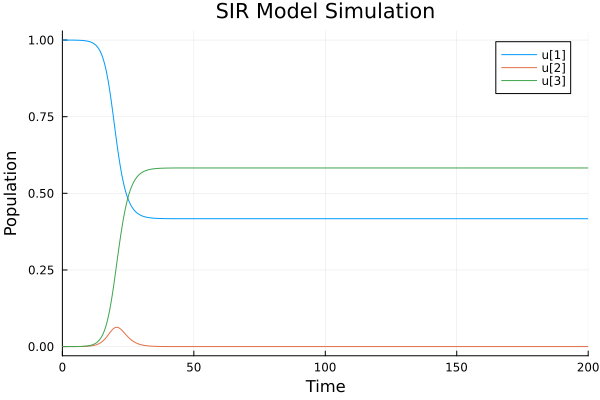

In [3]:

function SIR_model!(du, u, p, t)
    S, I, R = u
    R₀ = p
    β = R₀ / (S + I + R)  # Transmission rate
    γ = 1.0                # Recovery rate (assumed to be 1 for normalization)
    
    du[1] = -β * S * I     # dS/dt
    du[2] = β * S * I - γ * I  # dI/dt
    du[3] = γ * I          # dR/dt
end

using Plots

# Initial conditions
N = 100000  # total population
S₀ = (N - 1) / N
I₀ = 1 / N
R₀ = 0.0

u₀ = [S₀, I₀, R₀]  # Normalized initial conditions
tspan = (0.0, 200.0)  # Time span for simulation

# Define the problem
R₀_val = 1.5
problem = ODEProblem(SIR_model!, u₀, tspan, R₀_val)

# Solve the problem
solution = solve(problem, Tsit5(), reltol=1e-8, abstol=1e-8)

# Plotting the solution
plot(solution, xlabel="Time", ylabel="Population", title="SIR Model Simulation")

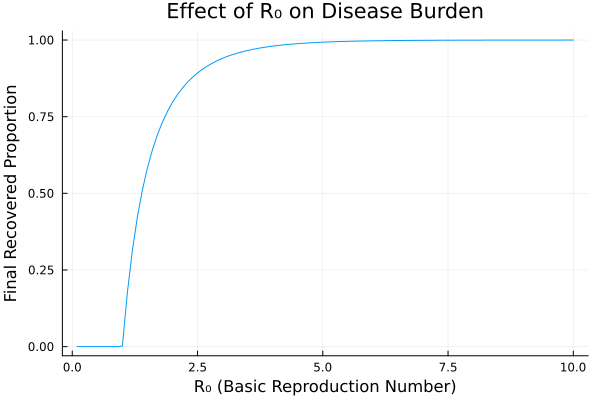

In [2]:



# R₀ range
R₀_values = range(0.1, stop=10, length=100)
final_R = []

# Simulate for each R₀ value
for R₀ in R₀_values
    problem = ODEProblem(SIR_model!, u₀, tspan, R₀)
    sol = solve(problem, Tsit5(), reltol=1e-8, abstol=1e-8)
    push!(final_R, sol[end][3])  # Push the final recovered fraction
end

# Plot the effect of R₀ on disease progression
plot(R₀_values, final_R, xlabel="R₀ (Basic Reproduction Number)", ylabel="Final Recovered Proportion",
     title="Effect of R₀ on Disease Burden", legend=false)
